In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import statistics as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_excel('DS1_C4_S9_Car_Data.xlsx')
Data

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [3]:
# for calculating null values.
# Data preprocessing.
Data.isnull().sum()

S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S. No.                          1276 non-null   int64  
 1   Make                            1201 non-null   object 
 2   Model                           1276 non-null   object 
 3   Variant                         1276 non-null   object 
 4   Displacement                    1264 non-null   float64
 5   Cylinders                       1210 non-null   float64
 6   Valves_Per_Cylinder             1174 non-null   float64
 7   Fuel_Tank_Capacity_litre        1207 non-null   float64
 8   Fuel_Type                       1276 non-null   object 
 9   Height_mm                       1275 non-null   float64
 10  Length_mm                       1276 non-null   float64
 11  Width_mm                        1264 non-null   float64
 12  Body_Type                       12

In [5]:
# Replacing the missing values in the Market segmentation Analysis.
Data['Make'].fillna('Not Available', inplace = True)
Data['Body_Type'].fillna('Not Available', inplace = True)

In [6]:
Data.isnull().sum()
# Replaced the missing values of Make, Body_Type with 'Not Available'.

S. No.                               0
Make                                 0
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            0
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

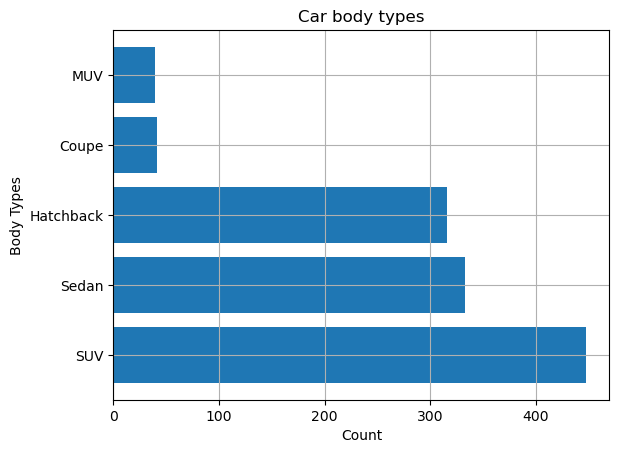

In [7]:
# Task 1
# A car manufracturer wants to introduce a new car and requires info about top 5 preferred car body types.

body_counts = Data['Body_Type'].value_counts()

# To identify the top 5 car body types 
top_5_body_types = body_counts.head(5)

plt.barh(top_5_body_types.index, top_5_body_types.values)
plt.title('Car body types')
plt.xlabel('Count')
plt.ylabel('Body Types')
plt.grid(True)
plt.show()


In [8]:
# Preprocessing the driving modes
Data['Drive_Modes'].fillna('Not Available', inplace = True)


In [9]:
Data.isnull().sum()

S. No.                               0
Make                                 0
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            0
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                          0
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [10]:
# Task 2

all_model_cars = Data[Data['Drive_Modes'].isin(['normal', 'comfort', 'eco', 'sport', 'power'])]

all_model_cars

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning


# Fuel efficiency analysis

In [12]:
Data['City_Mileage_km_litre'].fillna(Data['City_Mileage_km_litre'].mean(), inplace = True)
Data['Highway_Mileage_km_litre'].fillna(Data['Highway_Mileage_km_litre'].mean(), inplace = True)

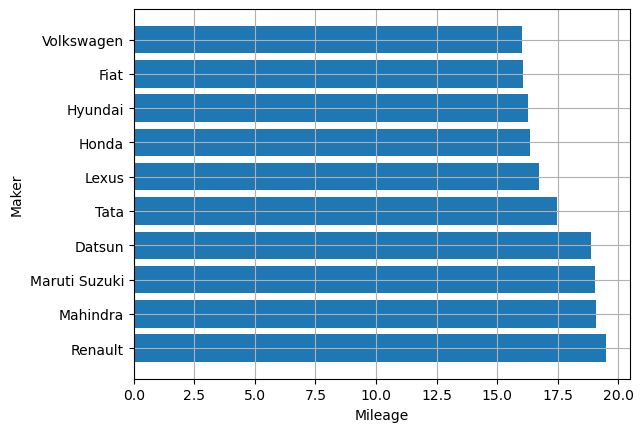

In [13]:
# Task 3
# Identifying manufractures with City_Mileage_km_litre.
top_10_manufracturers = Data.groupby('Make')['City_Mileage_km_litre'].mean().nlargest(10)

# Building barh
plt.barh(top_10_manufracturers.index, top_10_manufracturers.values)
plt.xlabel('Mileage')
plt.ylabel('Maker')
plt.grid(True)
plt.show()

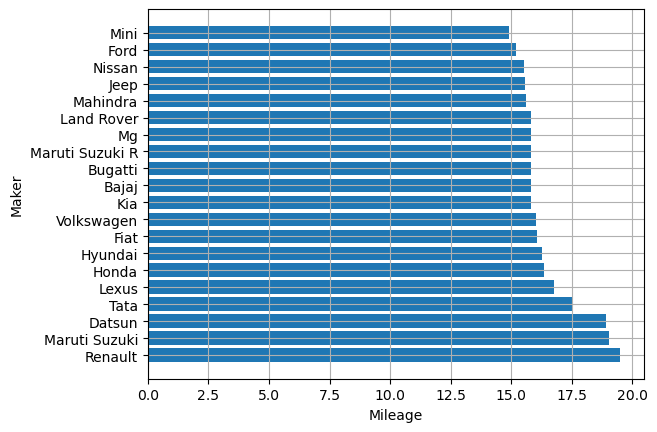

In [14]:
# Task 4
# Non-electric cars
Non_electric_cars = Data[Data['Fuel_Type'] != 'Electric']

# Top 20 cars
top_20_non_electric_cars = Non_electric_cars.groupby('Make')['City_Mileage_km_litre'].mean().nlargest(20)

# Displaying graph
plt.barh(top_20_non_electric_cars.index, top_20_non_electric_cars.values)
plt.xlabel('Mileage')
plt.ylabel('Maker')
plt.grid(True)
plt.show()

In [15]:
Data.isnull().sum()

S. No.                               0
Make                                 0
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            0
Doors                                4
City_Mileage_km_litre                0
Highway_Mileage_km_litre             0
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                          0
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [16]:
# Task 5
#Filtering the data
fitered_data = Data[Data['Make'].isin(['Hyundai', 'Mahindra', 'Renault', 'Skoda'])]

# Mean city mileage
mean_city_mileage = fitered_data.pivot_table(values = 'City_Mileage_km_litre', 
                               index = ['Make'],
                               aggfunc = 'mean')
mean_city_mileage

,City_Mileage_km_litre
Make,
Hyundai,16.267567
Mahindra,19.088655
Renault,19.501196
Skoda,14.516278


In [17]:
# Median city mileage
median_city_mileage = fitered_data.pivot_table(values = 'City_Mileage_km_litre', 
                               index = ['Make'],
                               aggfunc = 'median')
median_city_mileage

,City_Mileage_km_litre
Make,
Hyundai,15.815381
Mahindra,15.815381
Renault,21.040000
Skoda,15.100000


In [18]:
# Mean highway mileage
mean_highway_mileage = fitered_data.pivot_table(values = 'Highway_Mileage_km_litre', 
                               index = ['Make'],
                               aggfunc = 'mean')
mean_highway_mileage

,Highway_Mileage_km_litre
Make,
Hyundai,17.325799
Mahindra,17.483460
Renault,17.082279
Skoda,17.187148


In [19]:
# Median Highway Mileage
median_highway_mileage = fitered_data.pivot_table(values = 'Highway_Mileage_km_litre', 
                               index = ['Make'],
                               aggfunc = 'median')
median_highway_mileage

,Highway_Mileage_km_litre
Make,
Hyundai,16.879706
Mahindra,16.879706
Renault,16.879706
Skoda,16.879706


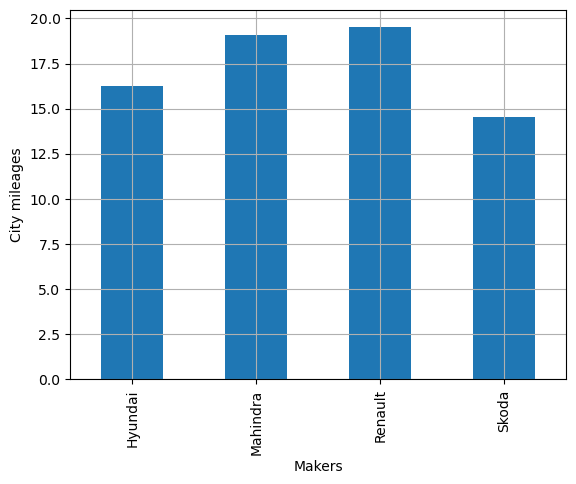

In [20]:
# Task 6
# Mean
Mean_city_mileages = fitered_data.groupby('Make')['City_Mileage_km_litre'].mean()

# Display stacked column chart
Mean_city_mileages.plot(kind = 'bar', stacked = True)
plt.xlabel('Makers')
plt.ylabel('City mileages')
plt.grid(True)
plt.show()

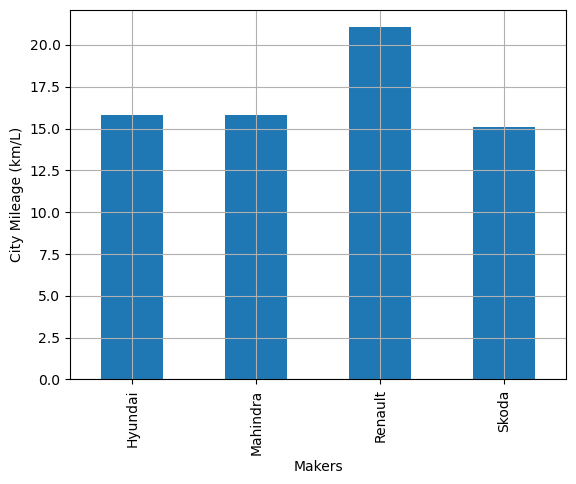

In [21]:
# Median
# Assuming your DataFrame is named 'Data'
filtered_data = Data[Data['Make'].isin(['Hyundai', 'Mahindra', 'Renault', 'Skoda'])]  # Filter data

# Calculate median city mileage for each Make
Median_city_mileages = filtered_data.groupby('Make')['City_Mileage_km_litre'].median()

# Display Stacked chart (assuming 'City_Mileage_km_litre' is numerical)
Median_city_mileages.plot(kind='bar', stacked=True)
plt.xlabel('Makers')
plt.ylabel('City Mileage (km/L)')  # Clarify units
plt.grid(True)
plt.show()

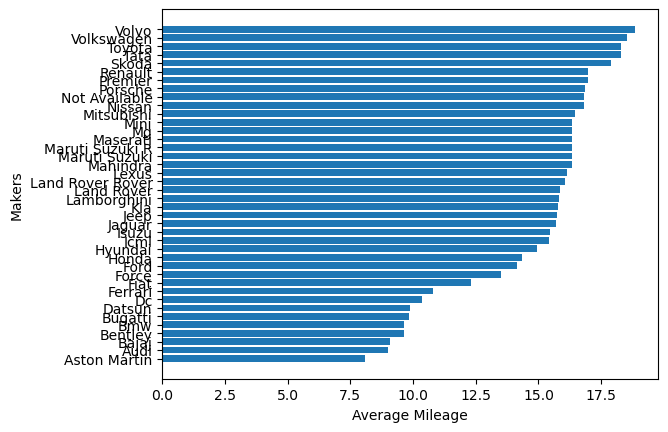

<Figure size 1000x600 with 0 Axes>

In [22]:
# Task 7
# Calculating average mileage 
Data['avg_mileage'] = (Data['City_Mileage_km_litre'] + Data['Highway_Mileage_km_litre'])/2
Avg_mileage_of_all = Data.groupby('Make')['avg_mileage'].mean()
Avg_mileage_of_all_sorted = Avg_mileage_of_all.sort_values()

# Displaying chart
plt.barh(Avg_mileage_of_all.index, Avg_mileage_of_all_sorted)
plt.xlabel('Average Mileage')
plt.ylabel('Makers')
plt.figure(figsize = (10, 6))
plt.show()

In [23]:
Data.isnull().sum()

S. No.                               0
Make                                 0
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            0
Doors                                4
City_Mileage_km_litre                0
Highway_Mileage_km_litre             0
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                          0
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [24]:
Data['Displacement'].fillna(Data['Displacement'].mean(), inplace = True)

In [26]:
# Task 8
# Top 10 cars with highest city mileage
to_10_highest_city_mileage_cars = Data['City_Mileage_km_litre'].sort_values()
to_10_highest_city_mileage_cars.nlargest(10)

to_10_Displacement = Data['Displacement'].sort_values()
to_10_Displacement.nlargest(10)

355     7993.0
356     7993.0
352     6752.0
353     6750.0
880     6749.0
1220    6749.0
354     6749.0
1219    6749.0
879     6598.0
349     6593.0
Name: Displacement, dtype: float64

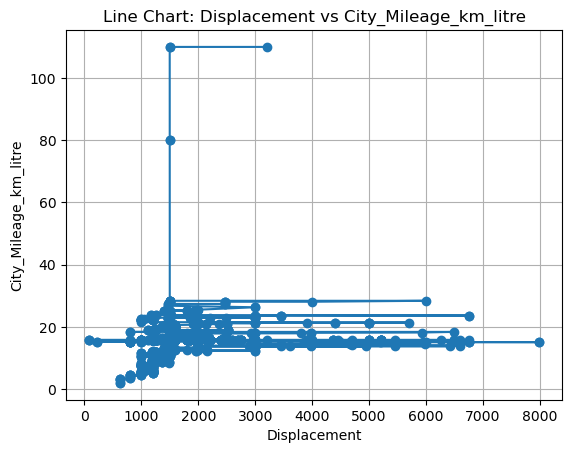

In [27]:
plt.plot(Data['Displacement'], to_10_highest_city_mileage_cars, marker ='o')
plt.title('Line Chart: Displacement vs City_Mileage_km_litre')
plt.xlabel('Displacement')
plt.ylabel('City_Mileage_km_litre')
plt.grid(True)
plt.show()

In [28]:
# Interpretation: Outliers are present in the Displacement - Mileage chart. We can resolve them by using the box-plots and statistical methods like IQR techniques can be resolved.

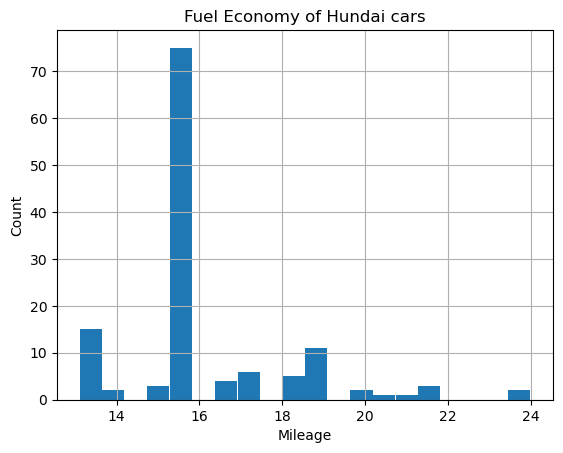

In [39]:
# Task 9
# Fuel Economy of Hundai cars

hyundai_data = Data[Data['Make'] == 'Hyundai']
plt.hist(hyundai_data['City_Mileage_km_litre'], rwidth = 0.98, bins = 20)
plt.title('Fuel Economy of Hundai cars')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [40]:
# Hyundai Skewness
# Calculate skewness of the 'City_Mileage_km_litre' column
from scipy.stats import skew
hyundai_skewness = hyundai_data['City_Mileage_km_litre'].skew()
print(f"Skewness of the City Mileage for Hyundai cars: {hyundai_skewness:.2f}")


Skewness of the City Mileage for Hyundai cars: 1.29


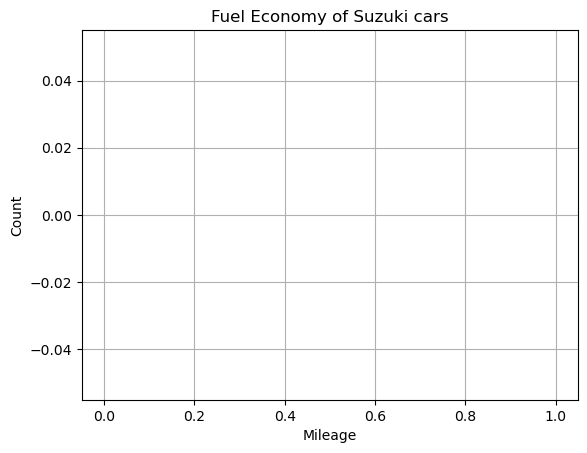

In [41]:
# Fuel Economy of Suzuki cars

suzuki_data = Data[Data['Make'] == 'Suzuki']
plt.hist(suzuki_data['City_Mileage_km_litre'], rwidth = 0.98)
plt.title('Fuel Economy of Suzuki cars')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [43]:
# Suzuki Skewness
# Calculate skewness of the 'City_Mileage_km_litre' column

suzuki_skewness = suzuki_data['City_Mileage_km_litre'].skew()
print(f"Skewness of the City Mileage for Hyundai cars: {suzuki_skewness:.2f}")

Skewness of the City Mileage for Hyundai cars: nan


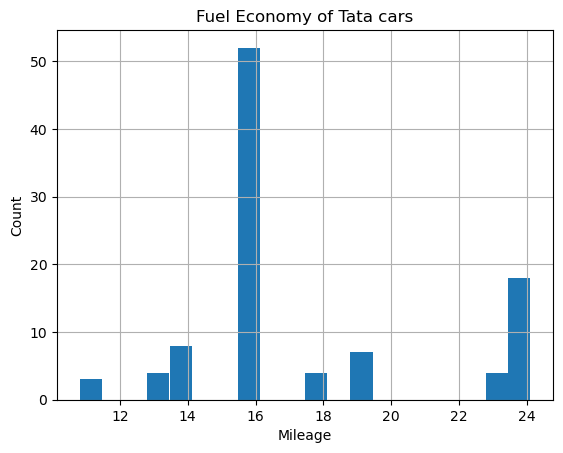

In [44]:
# Fuel Economy of Tata cars

tata_data = Data[Data['Make'] == 'Tata']
plt.hist(tata_data['City_Mileage_km_litre'], rwidth = 0.98, bins = 20)
plt.title('Fuel Economy of Tata cars')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [45]:
# Tata Skewness
# Calculate skewness of the 'City_Mileage_km_litre' column

tata_skewness = tata_data['City_Mileage_km_litre'].skew()
print(f"Skewness of the City Mileage for Hyundai cars: {tata_skewness:.2f}")

Skewness of the City Mileage for Hyundai cars: 0.78


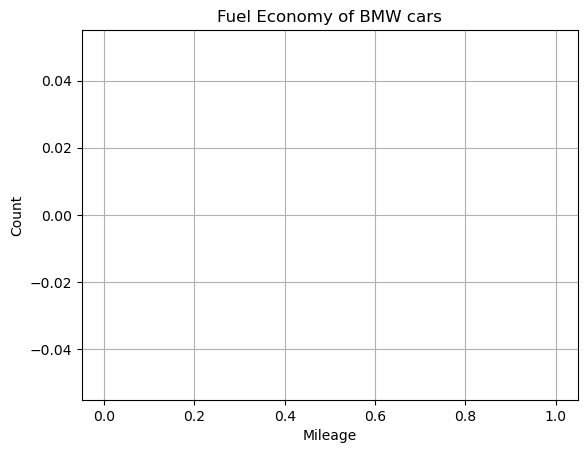

In [54]:
# Fuel Economy of BMW cars

bmw_data = Data[Data['Make'] == 'BMW']
plt.hist(bmw_data['City_Mileage_km_litre'], rwidth = 0.98)
plt.title('Fuel Economy of BMW cars')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [55]:
# BMW Skewness
# Calculate skewness of the 'City_Mileage_km_litre' column

bmw_skewness = bmw_data['City_Mileage_km_litre'].skew()
print(f"Skewness of the City Mileage for Hyundai cars: {bmw_skewness:.2f}")

Skewness of the City Mileage for Hyundai cars: nan


In [60]:
# Task 10
Data2 = Data [['Valves_Per_Cylinder', 'Kerb_Weight', 'Make', 'Displacement', 'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Power', 'Torque', 'Gross_Vehicle_Weight']]
Data2

,Valves_Per_Cylinder,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Gross_Vehicle_Weight
0,2.0,660 kg,Tata,624.0,24.0,23.600000,16.879706,38.0,51.0,NaN
1,2.0,725 kg,Tata,624.0,24.0,23.600000,16.879706,38.0,51.0,NaN
2,2.0,710 kg,Tata,624.0,15.0,15.815381,16.879706,38.0,51.0,NaN
3,2.0,725 kg,Tata,624.0,24.0,23.600000,16.879706,38.0,51.0,NaN
4,2.0,725 kg,Tata,624.0,24.0,23.600000,16.879706,38.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1271,4.0,1170 kg,Honda,1498.0,40.0,22.600000,25.100000,100.0,200.0,1545 kg
1272,4.0,1175 kg,Honda,1498.0,40.0,22.600000,25.100000,100.0,200.0,1550 kg
1273,4.0,1107 kg,Honda,1497.0,40.0,18.000000,18.000000,119.0,145.0,1482 kg
1274,4.0,1080 kg,Honda,1497.0,40.0,14.300000,16.400000,119.0,145.0,1455 kg


In [65]:
Data2.isnull().sum()

Valves_Per_Cylinder         102
Kerb_Weight                 365
Make                          0
Displacement                  0
Fuel_Tank_Capacity_litre     69
City_Mileage_km_litre         0
Highway_Mileage_km_litre      0
Power                         0
Torque                        2
Gross_Vehicle_Weight        595
dtype: int64

In [74]:
Data2['Valves_Per_Cylinder'].fillna(Data2['Valves_Per_Cylinder'].mean(), inplace = True)
Data2['Fuel_Tank_Capacity_litre'].fillna(Data2['Fuel_Tank_Capacity_litre'].mean(), inplace = True)
Data2['Torque'].fillna(Data2['Torque'].mean(), inplace = True)

In [76]:
# Task 11
# To remove kg we have to use the replace function. 

Data2['Gross_Vehicle_Weight']=Data2['Gross_Vehicle_Weight'].str.rstrip('NAâ€¯ kg')
Data2.iloc[314]['Gross_Vehicle_Weight']

'2155'

In [78]:
Data2['Kerb_Weight']=Data2['Kerb_Weight'].str.rstrip('NAâ€¯ kg')
Data2.iloc[314]['Kerb_Weight']

'1770'

In [82]:
Data2['Gross_Vehicle_Weight']=pd.to_numeric(Data2['Gross_Vehicle_Weight'])


In [90]:
Data2=Data2.drop(list(Data2.loc[Data2['Kerb_Weight']=='1016-1043'].index),axis=0)

In [98]:
Data2=Data2.drop(list(Data2.loc[Data2['Kerb_Weight']=='1053-1080'].index),axis=0)

In [100]:
Data2['Kerb_Weight']=pd.to_numeric(Data2['Kerb_Weight'])

In [102]:
Data2['Gross_Vehicle_Weight']=Data2['Gross_Vehicle_Weight'].fillna(Data2['Gross_Vehicle_Weight'].mean())
Data2['Gross_Vehicle_Weight'].isnull().sum()

0

In [104]:
Data2['Kerb_Weight']=Data2['Kerb_Weight'].fillna(Data2['Kerb_Weight'].mean())
Data2['Kerb_Weight'].isnull().sum()

0

In [106]:
# conversion of weight in kg to punds
Data2['Gross_Vehicle_Weight']=2.2*(Data2['Gross_Vehicle_Weight'])
Data2['Gross_Vehicle_Weight']

0       4188.898361
1       4188.898361
2       4188.898361
3       4188.898361
4       4188.898361
           ...     
1271    3399.000000
1272    3410.000000
1273    3260.400000
1274    3201.000000
1275    6842.000000
Name: Gross_Vehicle_Weight, Length: 1236, dtype: float64

In [108]:
Data2['Kerb_Weight']=2.2*(Data2['Kerb_Weight'])
Data2['Kerb_Weight']

0       1452.0
1       1595.0
2       1562.0
3       1595.0
4       1595.0
         ...  
1271    2574.0
1272    2585.0
1273    2435.4
1274    2376.0
1275    5137.0
Name: Kerb_Weight, Length: 1236, dtype: float64

# Performance Comparision

In [110]:
Data2.isnull().sum()

Valves_Per_Cylinder         0
Kerb_Weight                 0
Make                        0
Displacement                0
Fuel_Tank_Capacity_litre    0
City_Mileage_km_litre       0
Highway_Mileage_km_litre    0
Power                       0
Torque                      0
Gross_Vehicle_Weight        0
dtype: int64

<Axes: title={'center': 'Displacement'}, xlabel='Make'>

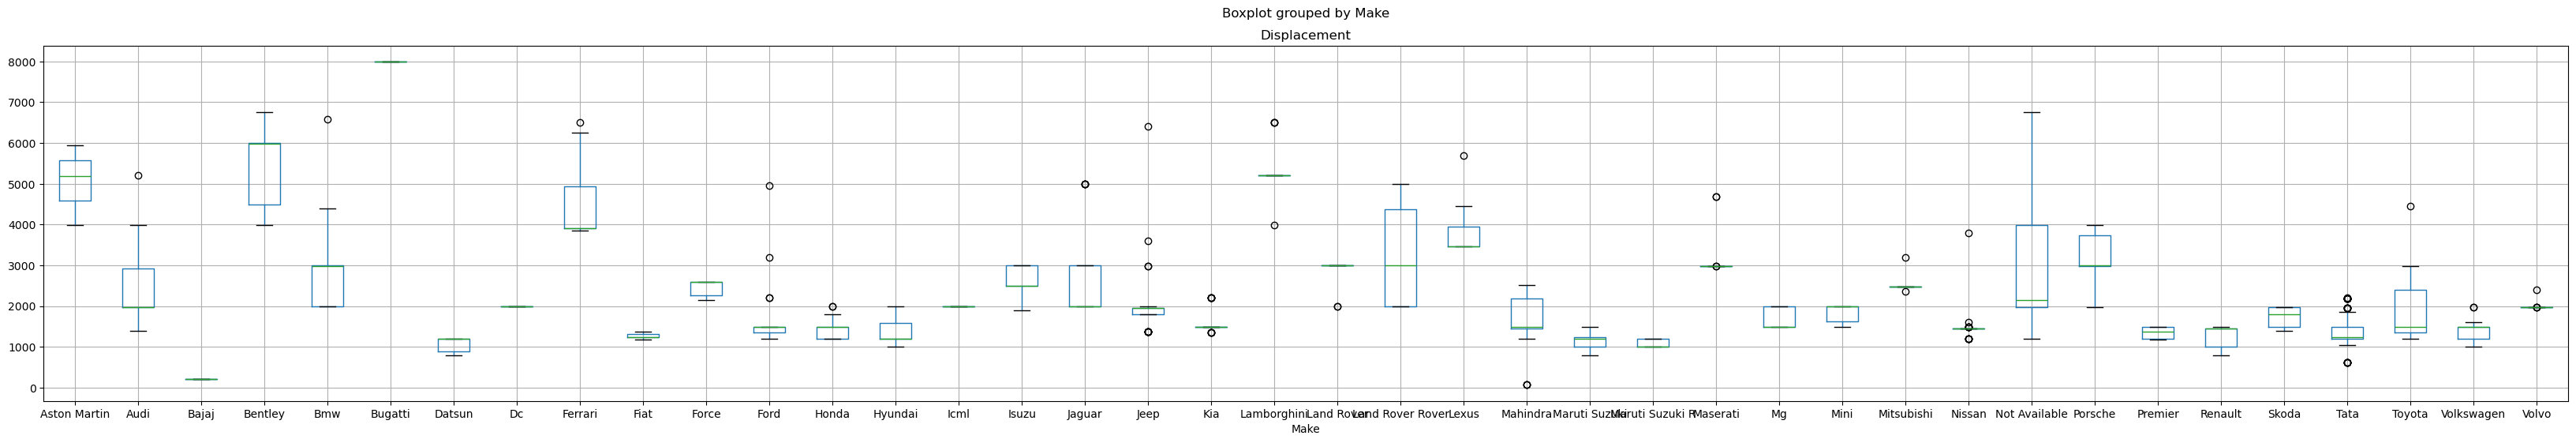

In [112]:
# Task 12
Data2.boxplot(by = 'Make', column = ['Displacement'], figsize = (40, 6) )

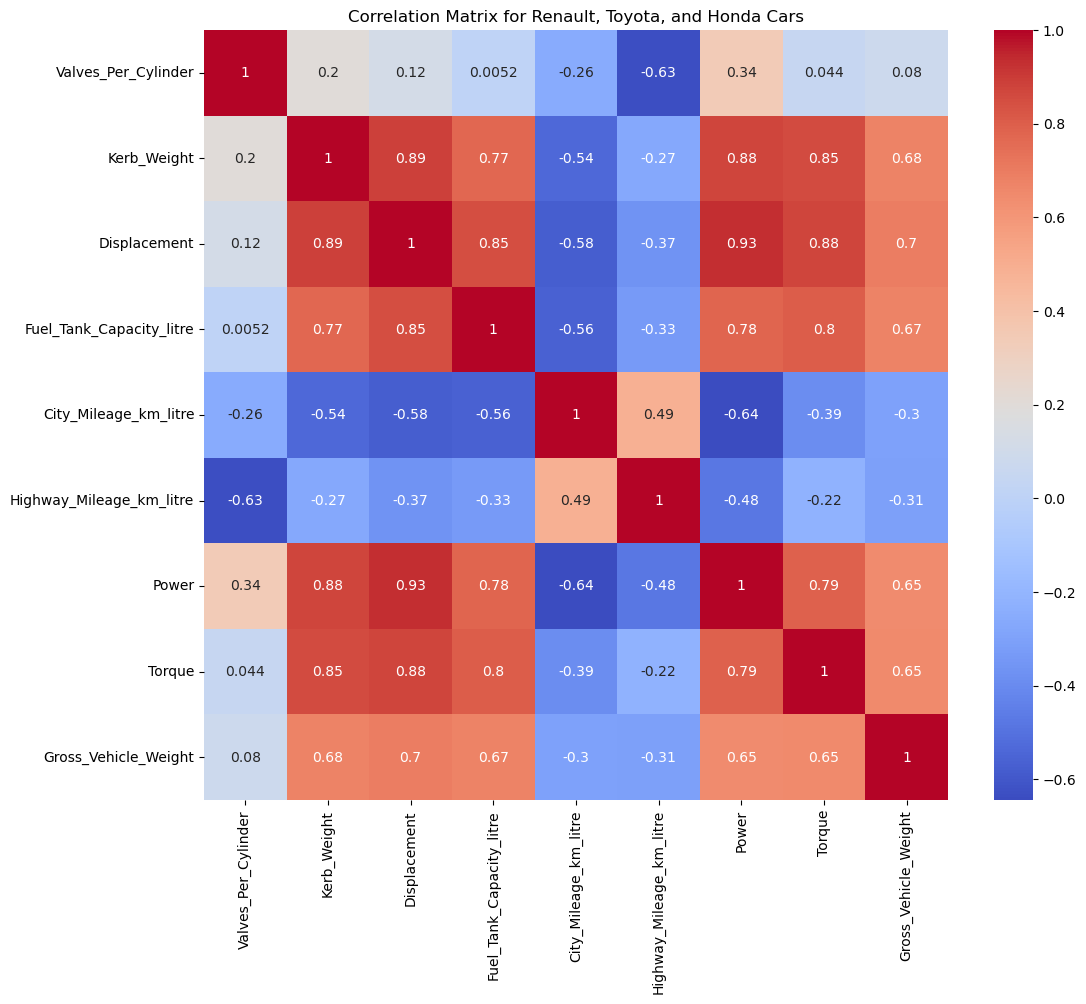

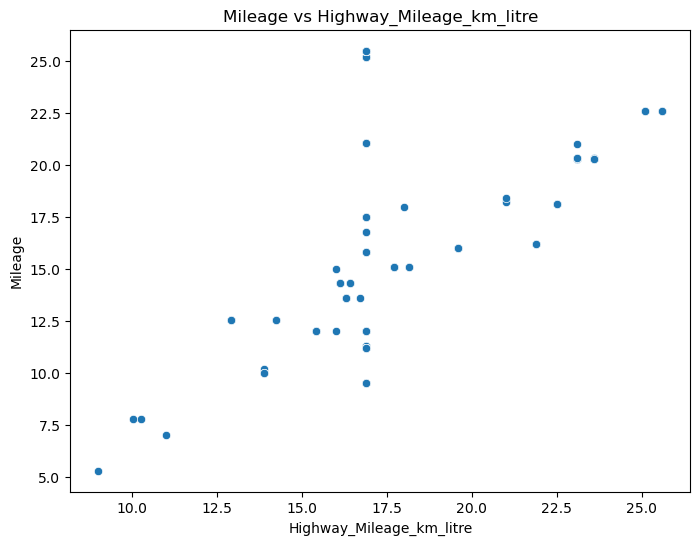

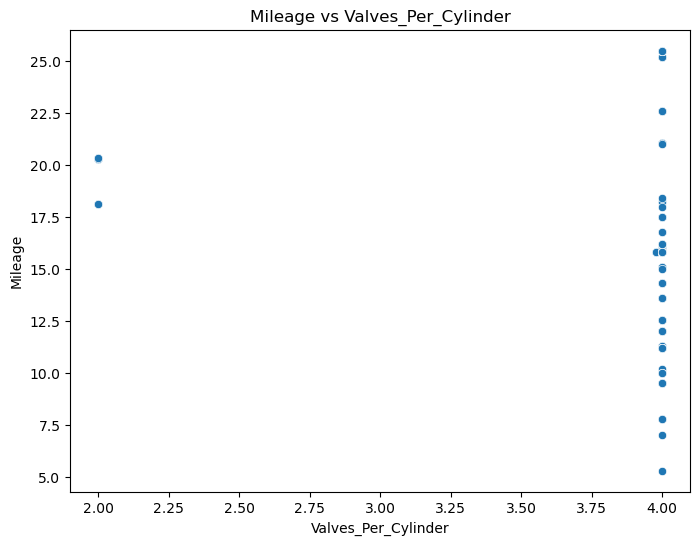

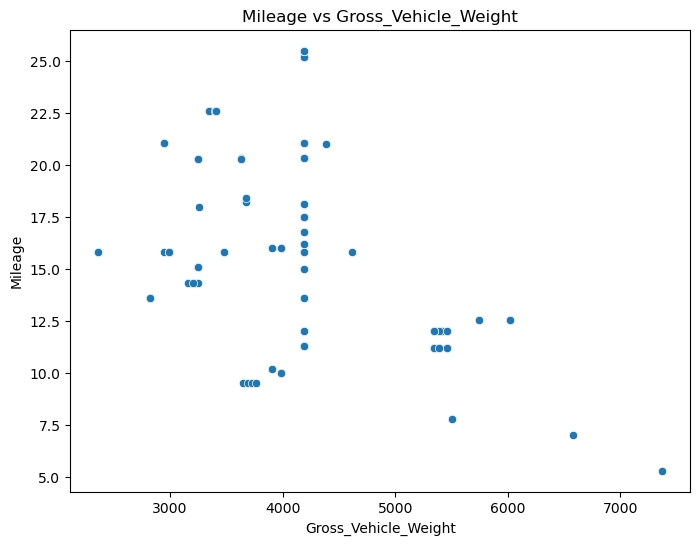

In [114]:
# Task 13
filtered_data = Data2[Data2['Make'].isin(['Renault', 'Toyota', 'Honda'])]

numeric_cols = [col for col in filtered_data.columns if filtered_data[col].dtype != 'object']

corr_matrix = filtered_data[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Renault, Toyota, and Honda Cars')
plt.show()

top_features = corr_matrix['City_Mileage_km_litre'].sort_values(ascending=False).head(4)[1:]  # Exclude 'Mileage' itself

for feature in top_features.index:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x= feature, y='City_Mileage_km_litre', data=filtered_data)
    plt.title(f'Mileage vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Mileage')
    plt.show()

In [118]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1236 entries, 0 to 1275
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Valves_Per_Cylinder       1236 non-null   float64
 1   Kerb_Weight               1236 non-null   float64
 2   Make                      1236 non-null   object 
 3   Displacement              1236 non-null   float64
 4   Fuel_Tank_Capacity_litre  1236 non-null   float64
 5   City_Mileage_km_litre     1236 non-null   float64
 6   Highway_Mileage_km_litre  1236 non-null   float64
 7   Power                     1236 non-null   float64
 8   Torque                    1236 non-null   float64
 9   Gross_Vehicle_Weight      1236 non-null   float64
dtypes: float64(9), object(1)
memory usage: 106.2+ KB


# weight Distribution Study

In [120]:
# Task 14
ts=Data2.groupby("Make").agg({'Kerb_Weight':['mean','median','std'],'Gross_Vehicle_Weight':['mean','median','std']})
ts

ts.insert(3,'Kerb_Weight_CV', ts['Kerb_Weight']['std'] / ts['Kerb_Weight']['mean'] * 100)
ts['Gross_Vehicle_Weight_CV'] = ts['Gross_Vehicle_Weight']['std'] / ts['Gross_Vehicle_Weight']['mean'] * 100
ts

Kerb_Weight                           Kerb_Weight_CV  \
                         mean       median          std                  
Make                                                                     
Aston Martin      3813.333333  3696.000000   516.102057      13.534145   
Audi              3982.000000  3916.000000   753.233651      18.915963   
Bajaj             3050.997957  3050.997957     0.000000       0.000000   
Bentley           5407.233333  5335.000000   268.974331       4.974343   
Bmw               3462.091008  3498.000000   409.623164      11.831669   
Bugatti           4389.000000  4389.000000     0.000000       0.000000   
Datsun            2360.879183  1900.800000   583.256818      24.705068   
Dc                3476.000000  3476.000000          NaN            NaN   
Ferrari           3594.250000  3470.500000   449.627703      12.509639   
Fiat              2677.651996  2673.000000   162.516305       6.069359   
Force             3050.997957  3050.997957     0.000000       0.000000   
Ford              2811.077288  2695.000000   790.310476      28.114150   
Honda             2485.712436  2424.400000   353.654092      14.227474   
Hyundai           2823.704325  3050.997957   374.372668      13.258211   
Icml              3778.800000  3762.000000    28.773321       0.761441   
Isuzu             3778.999183  4257.000000   664.631844      17.587510   
Jaguar            3696.675899  3711.400000   346.391515       9.370351   
Jeep              3730.557070  3436.400000   699.488861      18.750252   
Kia               3050.997957  3050.997957     0.000000       0.000000   
Lamborghini       3314.661224  3128.400000   486.568319      14.679277   
Land Rover        3359.078365  3050.997957   649.490529      19.335379   
Land Rover Rover  4613.147694  4694.800000  1040.680216      22.559005   
Lexus             5175.342857  5108.400000   533.409433      10.306746   
Mahindra          3329.980448  3050.997957   500.359308      15.025893   
Maruti Suzuki     2070.652322  2013.000000   357.307654      17.255801   
Maruti Suzuki R   2875.998249  3050.997957   444.841495      15.467377   
Maserati          3758.443763  3982.000000   545.217720      14.506475   
Mg                3050.997957  3050.997957     0.000000       0.000000   
Mini              3098.333333  2887.500000   603.725324      19.485487   
Mitsubishi        4311.057143  4257.000000   473.287886      10.978465   
Nissan            2983.757212  3050.997957   297.544612       9.972146   
Not Available     3973.011147  3469.400000  1077.246780      27.114114   
Porsche           4119.285422  4103.000000   972.566216      23.610071   
Premier           2471.333333  2519.000000    73.844882       2.988058   
Renault           2336.171995  2851.200000   672.636269      28.792241   
Skoda             2960.841860  2948.000000   372.176373      12.569951   
Tata              2908.791081  3050.997957   849.504357      29.204722   
Toyota            2782.785059  2409.000000   891.831926      32.048179   
Volkswagen        2555.080000  2510.200000   362.653674      14.193437   
Volvo             4564.486989  3785.100000  1562.306741      34.227433   

                 Gross_Vehicle_Weight                            \
                                 mean       median          std   
Make                                                              
Aston Martin              4318.665574  4188.898361   224.763406   
Audi                      5013.093496  4807.000000   857.634503   
Bajaj                     4188.898361  4188.898361     0.000000   
Bentley                   6744.466667  6789.200000   443.500939   
Bmw                       4628.136996  4188.898361   637.268870   
Bugatti                   4188.898361  4188.898361     0.000000   
Datsun                    4188.898361  4188.898361     0.000000   
Dc                        3476.000000  3476.000000          NaN   
Ferrari                   4188.898361  4188.898361     0.000000   
Fiat                      3887.